# Predicción del tipo de cambio del dólar para el 2025, basado en datos del 2022 al 2024

## Metodología

Utilizando el tipo de cambio del colón respecto al dólar (venta), con datos del 2022 al 2024, se calculará el porcentaje de cambio en el promedio anual del tipo de cambio:

- Porcentaje de cambio del 2022 al 2023.
- Porcentaje de cambio del 2023 al 2024.

Utilizando estos porcentajes, se promediarán los valores, de manera que se pueda obtener un valor general de comportamiento sobre el tipo de cambio, prediciendo un promedio para el año 2025.

## Fuente de los datos

Banco Central de Costa Rica. (2024). Tipo de cambio. Recuperado de: https://gee.bccr.fi.cr/indicadoreseconomicos/Cuadros/frmVerCatCuadro.aspx?idioma=1&CodCuadro=400

## Enlace del CSV

https://docs.google.com/spreadsheets/d/1m4IC5pMf5zvrSYSAxSvhzMYd7y9ngHkRwcSh-e6WY3c/edit?usp=sharing

650.7515890410959
547.2396438356163
513.7801418439715
-15.906522081337965
-6.114232104444476
-11.01037709289122
457.21101079855885


Porcentajes de Diferencia de Tipo de Cambio 
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Años    ┃ Porcentaje de Diferencia (%) ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 2022-2023 │            -15.91            │
│ 2023-2024 │            -6.11             │
│ Promedio  │            -11.01            │
└───────────┴──────────────────────────────┘

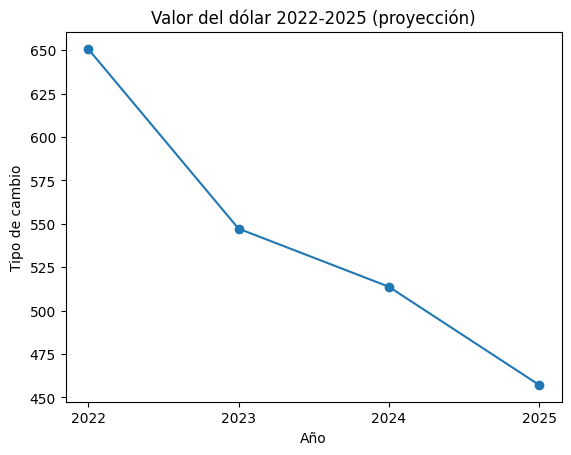

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from rich.console import Console
from rich.table import Table

# Leer el archivo CSV con los datos de tipos de cambio
df = pd.read_csv("/content/tiposDeCambio2022-2024.csv")
data = pd.DataFrame(df)

# Calcular el promedio del tipo de cambio para cada año
promedio2022: float = data.query("ANNIO == 2022")["VENTA"].mean()
promedio2023: float = data.query("ANNIO == 2023")["VENTA"].mean()
promedio2024: float = data.query("ANNIO == 2024")["VENTA"].mean()

print(promedio2022)
print(promedio2023)
print(promedio2024)

# Calcular el porcentaje de diferencia entre los promedios de los años 2022-2023 y 2023-2024
diferencia2022_2023: float = ((promedio2023 - promedio2022) / promedio2022) * 100
diferencia2023_2024: float = ((promedio2024 - promedio2023) / promedio2023) * 100

print(diferencia2022_2023)
print(diferencia2023_2024)

# Calcular el promedio de los porcentajes de diferencia
promedioPorcentajes: float = (diferencia2022_2023 + diferencia2023_2024) / 2
print(promedioPorcentajes)

# Proyección del valor promedio del dólar para el año 2025
promedio2025: float = promedio2024 + (promedio2024 * promedioPorcentajes / 100)
print(promedio2025)

# Crear una tabla para mostrar los porcentajes
console = Console()
table = Table(title="Porcentajes de Diferencia de Tipo de Cambio")

table.add_column("Años", justify="center", style="cyan")
table.add_column("Porcentaje de Diferencia (%)", justify="center", style="cyan")

table.add_row("2022-2023", f"{diferencia2022_2023:.2f}")
table.add_row("2023-2024", f"{diferencia2023_2024:.2f}")
table.add_row("Promedio", f"{promedioPorcentajes:.2f}")

console.print(table)

# Crear una gráfica de los tipos de cambio de los años 2022, 2023, 2024 y la proyección para 2025
anios = ["2022", "2023", "2024", "2025"]
promedios = [promedio2022, promedio2023, promedio2024, promedio2025]

plt.plot(anios, promedios, marker='o')
plt.title("Valor del dólar 2022-2025 (proyección)")
plt.xlabel("Año")
plt.ylabel("Tipo de cambio")

# Mostrar el gráfico
plt.show()